<a href="https://colab.research.google.com/github/jindehuang1/ml2dl_huang/blob/main/ml2dl_simple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## 用keras生成一个单层感知机

# Task
用keras生成一个单层感知机，并用dummy data训练和预测。

## Import necessary libraries

### Subtask:
Import necessary libraries


**Reasoning**:
Import the necessary libraries for building and training a neural network using Keras.



In [1]:
## import bage
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

## 2.data

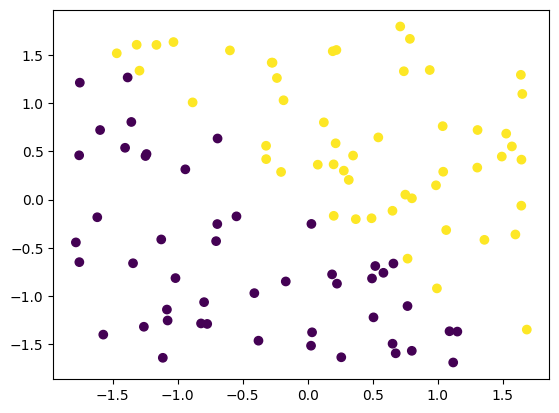

In [12]:
# prompt: 10 random numbers using numpy

import numpy as np

# Generate 100 random data points with 2 features
np.random.seed(0) # for reproducibility
x = np.random.rand(100, 2) * 10 - 5 # Generate random data between -5 and 5
y = (x[:, 0]+x[:, 1] > 0).astype(int) # Simple classification rule based on the sum of features

scaler = StandardScaler()
x = scaler.fit_transform(x)
plt.scatter(x[:,0],x[:,1],c=y)
plt.show()

### 3.Define the model

### Subtask:
Create a sequential model with a single dense layer.


**Reasoning**:
Instantiate a Sequential model and add a Dense layer with an appropriate input shape and activation function.



In [13]:
model = keras.Sequential([
    keras.layers.Dense(units=1, input_shape=(2,), activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

## 4.train the model

In [15]:
model.fit(x, y, epochs=100)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.1831 - loss: 1.2924  
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2029 - loss: 1.2538 
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1852 - loss: 1.2402 
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2040 - loss: 1.2475 
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1800 - loss: 1.2409 
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2342 - loss: 1.1891 
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1946 - loss: 1.2527 
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2113 - loss: 1.2348
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1967 - loss: 1.2199 
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2217 - loss: 1.2226 
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1779 - loss: 1.2586
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1967 - l

## 5.metrice

## 6.visaul

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


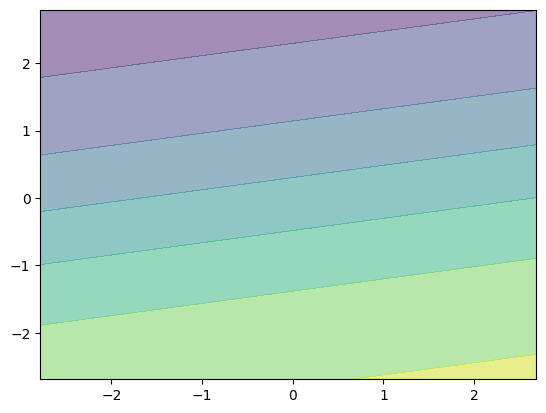

In [16]:
min_x1,max_x1=x[:,0].min(),x[:,0].max()
min_x2,max_x2=x[:,1].min(),x[:,1].max()
xx,yy=np.meshgrid(np.linspace(min_x1-1,max_x1+1,100),np.linspace(min_x2-1,max_x2+1,100))
z=model.predict(np.c_[xx.ravel(),yy.ravel()])
z=z.reshape(xx.shape)
plt.contourf(xx,yy,z,alpha=0.5)